In [7]:
import os

import numpy as np
from ipynb.fs.full.GenSnippetsLib import *

(235, 593, 4)
960
664


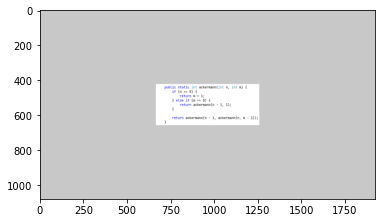

In [32]:
generator_folder = os.getcwd() + "\\CodeSnippets\\Generators"
snippet_folder = os.getcwd() + "\\CodeSnippets\\Snippets"

files = os.listdir(generator_folder)

for file in files:
    filename, _file_extension = os.path.splitext(file)
    img, result = create_image(generator_folder + "\\" + file)
    img.save(snippet_folder + "\\" + filename + ".png")